# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Importing the relevant modules for weather analyses
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import scipy.stats as st

# Importing the API Key
from api_keys import weather_api_key

# Setting Unit of Measurement for Temperature
celsius ='metric'

# Setting up the query URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={celsius}&q="



## Generate Cities List

In [2]:
# Preparing lists to store random lattitude and longitude coordinates
random_lat_long = []
city_names = []

# Creting Random Lattitudes
ran_lattitude = np.random.uniform(low=-90.000, high=90.000, size=1500)
ran_longitude = np.random.uniform(low=-180.000, high=180.000, size=1500)
random_lat_long = zip(ran_lattitude,ran_longitude)

# Assigning the nearest city to the coordinates
for lat_long in random_lat_long:
    city = citipy.nearest_city(lat_long[0],lat_long[1]).city_name

    # Ensuring only unique city names are added
    if city in city_names:
        next
    else:
        city_names.append(city)
print(f'The number of cities added are {len(city_names)}')


The number of cities added are 608


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
updated_city_list = []
cloudinesses = []
dates = []
humidity = []
lattitude = []
longitude = []
max_temp = []
wind = []
country_list = []

# set initial count quantities for organization
record_number = 0
record_sets = 1

# loops for creating dataframe columns
print(f'Data Retreival commencing\n---------------------\n')
for city in city_names:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lattitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        if record_number > 49:
            record_number = 1
            record_sets += 1
            updated_city_list.append(city)
        else:
            record_number += 1
            updated_city_list.append(city)
        print(f"Processing Record {record_number} of Set {record_sets} | {city}")
    except Exception:
        print(f"{city} not found. Proceeding to the next city...")
print("------------------------------")
print("Data Retrieval Complete\n------------------------------")    

Data Retreival commencing
---------------------

Processing Record 1 of Set 1 | chimore
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | manama
Processing Record 4 of Set 1 | cukai
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | avera
achisay not found. Proceeding to the next city...
Processing Record 7 of Set 1 | port hardy
Processing Record 8 of Set 1 | trairi
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | french harbor
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | fare
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | santa rosa
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | vila fran

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# The data generated from the API calls will be compiled into a new Data Fram
weather_data_frame = pd.DataFrame({
    'City':updated_city_list,
    'Lattitude':lattitude,
    'Longitude': longitude,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudinesses,
    'Wind Speed': wind,
    'Country': country_list,
    'Date':dates
})

## Exporting the new DataFrame into a csv file
weather_data_frame.to_csv('..\Output_Data\Weather_Data_Collection.csv')

## Displaying the DataFrame
print(f'{weather_data_frame.shape[0]} cities, along with their weather information, have been collated\n')
weather_data_frame.head()

550 cities, along with their weather information, have been collated



,City,Lattitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chimore,-16.98,-65.13,21.93,95,83,1.47,BO,1601260540
1,yellowknife,62.46,-114.35,7.00,87,75,4.60,CA,1601260540
2,manama,26.22,50.58,32.00,59,0,1.50,BH,1601260296
3,cukai,4.25,103.42,27.00,83,40,1.50,MY,1601260341
4,sao filipe,20.51,76.21,22.99,89,16,3.53,IN,1601260541


In [5]:
## Summary Statistics 
weather_data_frame.describe()

,Lattitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,22.259055,22.437073,18.232455,73.734545,49.956364,3.460145,1.601261e+09
std,31.410066,87.910294,8.650030,18.960473,39.050268,2.403755,9.946380e+01
min,-54.800000,-179.170000,-10.840000,10.000000,0.000000,0.150000,1.601260e+09
25%,-3.377500,-51.565000,11.015000,64.000000,6.000000,1.702500,1.601260e+09
50%,24.860000,27.350000,20.035000,78.000000,51.500000,2.835000,1.601261e+09
75%,47.140000,99.610000,25.247500,88.000000,90.000000,4.650000,1.601261e+09
max,78.220000,179.320000,34.000000,100.000000,100.000000,20.670000,1.601261e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Checking to see if there are cities with humidities over 100
weather_data_frame[weather_data_frame['Humidity']>100]

,City,Lattitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
indexNames_Over100 = weather_data_frame[weather_data_frame['Humidity']>100].index


In [8]:
if (len(indexNames_Over100)) > 0:
    print(f'There are cities with humidity over 100')
else:
    print(f'There are no cities with humidity over 100')

There are no cities with humidity over 100


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data_frame.drop(indexNames_Over100, inplace=False)


In [10]:
print(f'There are {clean_city_data.shape[0]} cities to be assessed\n')
clean_city_data.head()

There are 550 cities to be assessed



,City,Lattitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chimore,-16.98,-65.13,21.93,95,83,1.47,BO,1601260540
1,yellowknife,62.46,-114.35,7.00,87,75,4.60,CA,1601260540
2,manama,26.22,50.58,32.00,59,0,1.50,BH,1601260296
3,cukai,4.25,103.42,27.00,83,40,1.50,MY,1601260341
4,sao filipe,20.51,76.21,22.99,89,16,3.53,IN,1601260541


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

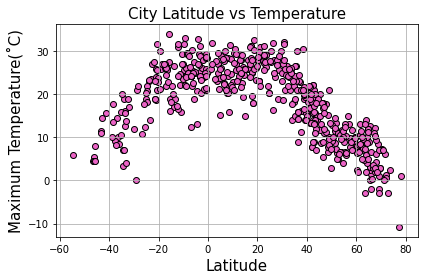

In [11]:
# A scatter plot will be used in order to determine the relationship between temperature and lattitudes
x_lattitude = clean_city_data['Lattitude']
y_temperature = clean_city_data['Max Temp']
fig1, ax1 = plt.subplots()
ax1.set_title('City Latitude vs Temperature',fontsize=15)
ax1.set_ylabel('Maximum Temperature(˚C)', fontsize=15)
ax1.set_xlabel('Latitude',fontsize=15)
ax1.scatter(x_lattitude,y_temperature, edgecolors='black', c='#eb63c6')
ax1.grid(True)
fig1.tight_layout()
plt.savefig('../Images/Latitude_vs_Temperature.png')
plt.show()




## Latitude vs. Humidity Plot

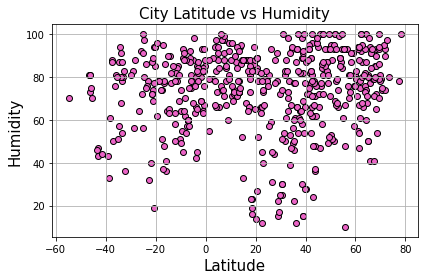

In [12]:
# We will use the previous x_label and create a new Y label pertaining to humidity
y_humidity = clean_city_data['Humidity']
fig1, ax1 = plt.subplots()
ax1.set_title('City Latitude vs Humidity',fontsize=15)
ax1.set_ylabel('Humidity', fontsize=15)
ax1.set_xlabel('Latitude',fontsize=15)
ax1.scatter(x_lattitude,y_humidity, edgecolors='black',c='#eb63c6')
ax1.grid(True)
fig1.tight_layout()
plt.savefig('../Images/Latitude_vs_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

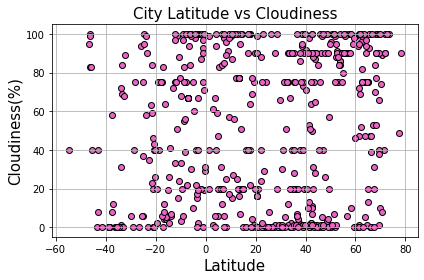

In [13]:
# We will set a new y_ variable pertaining to Cloudiness
y_cloudiness = clean_city_data['Cloudiness']
fig1, ax1 = plt.subplots()
ax1.set_title('City Latitude vs Cloudiness',fontsize=15)
ax1.set_ylabel('Cloudiness(%)', fontsize=15)
ax1.set_xlabel('Latitude',fontsize=15)
ax1.scatter(x_lattitude,y_cloudiness, edgecolors='black',c='#eb63c6')
ax1.grid(True)
fig1.tight_layout()
plt.savefig('../Images/Latitude_vs_Cloudiness.png')
plt.show()


## Latitude vs. Wind Speed Plot

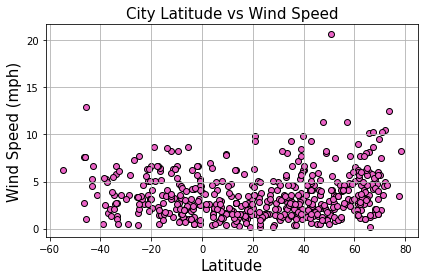

In [14]:
# We wil set a new y_ variable pertaining to Wind Speed
y_windspeed = clean_city_data['Wind Speed']
fig1, ax1 = plt.subplots()
ax1.set_title('City Latitude vs Wind Speed',fontsize=15)
ax1.set_ylabel('Wind Speed (mph)', fontsize=15)
ax1.set_xlabel('Latitude',fontsize=15)
ax1.scatter(x_lattitude,y_windspeed, edgecolors='black',c='#eb63c6')
ax1.grid(True)
fig1.tight_layout()
plt.savefig('../Images/Latitude_vs_WindSpeed.png')
plt.show()

## Linear Regression

#### Northern Hemisphere Latitudes vs Max Temperature

The r-sqaured value is 0.7328164223267924


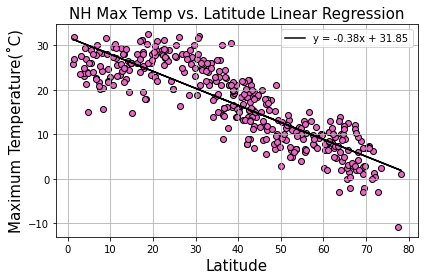

In [15]:
# All cities within the Northern Hemisphere will be in the lattitude range of 0(equator) to 90. 
# We will need to filter the dataframe to contain cities within the northern hemisphere (nh)

northern_hemisphere_cities_df = clean_city_data[clean_city_data['Lattitude']>=0]

x_nh_latitude = northern_hemisphere_cities_df['Lattitude']
y_nh_max_temp = northern_hemisphere_cities_df['Max Temp']

# Setting the Linear Regression Equation
latnh_slope, latnh_int, latnh_r,latnh_p,latnh_stderr = st.linregress(x_nh_latitude,y_nh_max_temp)

# Linear Regression Label
line_eq = "y = " + str(round(latnh_slope,2)) + "x + " + str(round(latnh_int,2))

line_of_best_fit = x_nh_latitude * latnh_slope + latnh_int

# Plotting the scatter plots with the Linear Regression Equation
fig2, ax2 = plt.subplots()
ax2.set_title('NH Max Temp vs. Latitude Linear Regression',fontsize=15)
ax2.set_ylabel('Maximum Temperature(˚C)', fontsize=15)
ax2.set_xlabel('Latitude',fontsize=15)
ax2.plot(x_nh_latitude,line_of_best_fit,'black')
ax2.scatter(x_nh_latitude,y_nh_max_temp, edgecolors='black',c='#eb63c6')
ax2.grid(True)
ax2.legend([line_eq])
fig2.tight_layout()
plt.savefig('../Images/NH_Latitude_vs_Max_Temp.png')
print(f'The r-sqaured value is {latnh_r**2}')
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-sqaured value is 0.5573060765498581


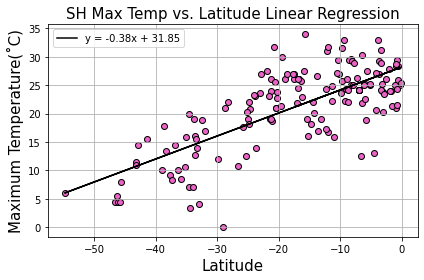

In [16]:
# All cities within the Southern Hemisphere will be in the lattitude range of 0(equator) to -90. 
# We will need to filter the dataframe to contain cities within the southern hemisphere (sh)

southern_hemisphere_cities_df = clean_city_data[clean_city_data['Lattitude']<=0]

x_sh_latitude = southern_hemisphere_cities_df['Lattitude']
y_sh_max_temp = southern_hemisphere_cities_df['Max Temp']

# Setting the Linear Regression Equation
latsh_slope, latsh_int, latsh_r,latsh_p,latsh_stderr = st.linregress(x_sh_latitude,y_sh_max_temp)

# Linear Regression Label
line_eq_sh = "y = " + str(round(latsh_slope,2)) + "x + " + str(round(latsh_int,2))

line_of_best_fit_sh = x_sh_latitude * latsh_slope + latsh_int

# Plotting the scatter plots with the Linear Regression Equation
fig2, ax2 = plt.subplots()
ax2.set_title('SH Max Temp vs. Latitude Linear Regression',fontsize=15)
ax2.set_ylabel('Maximum Temperature(˚C)', fontsize=15)
ax2.set_xlabel('Latitude',fontsize=15)
ax2.plot(x_sh_latitude,line_of_best_fit_sh,'black')
ax2.scatter(x_sh_latitude,y_sh_max_temp, edgecolors='black',c='#eb63c6')
ax2.grid(True)
ax2.legend([line_eq])
fig2.tight_layout()
plt.savefig('../Images/sh_Latitude_vs_Max_Temp.png')
print(f'The r-sqaured value is {latsh_r**2}')
plt.show()




####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-sqaured value is 0.007930660266261588


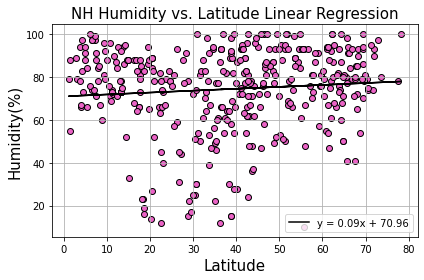

In [17]:
# Creating New y_axis data
x_nh_latitude = northern_hemisphere_cities_df['Lattitude']
y_nh_humidity = northern_hemisphere_cities_df['Humidity']

# Setting the Linear Regression Equation
latnh_slope, latnh_int, latnh_r,latnh_p,latnh_stderr = st.linregress(x_nh_latitude,y_nh_humidity)

# Linear Regression Label
line_eq = "y = " + str(round(latnh_slope,2)) + "x + " + str(round(latnh_int,2))

line_of_best_fit = x_nh_latitude * latnh_slope + latnh_int

# Plotting the scatter plots with the Linear Regression Equation
fig2, ax2 = plt.subplots()
ax2.set_title('NH Humidity vs. Latitude Linear Regression',fontsize=15)
ax2.set_ylabel('Humidity(%)', fontsize=15)
ax2.set_xlabel('Latitude',fontsize=15)
ax2.plot(x_nh_latitude,line_of_best_fit,'black')
ax2.scatter(x_nh_latitude,y_nh_humidity, edgecolors='black',c='#eb63c6')
ax2.grid(True)
ax2.legend([line_eq])
fig2.tight_layout()
plt.savefig('../Images/NH_Latitude_vs_Humidity.png')
print(f'The r-sqaured value is {latnh_r**2}')
plt.show()




####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-sqaured value is 0.010247495517630472


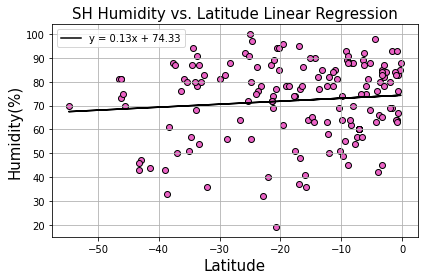

In [18]:
# Creating New y_axis data
x_sh_latitude = southern_hemisphere_cities_df['Lattitude']
y_sh_humidity = southern_hemisphere_cities_df['Humidity']

# Setting the Linear Regression Equation
latsh_slope, latsh_int, latsh_r,latsh_p,latsh_stderr = st.linregress(x_sh_latitude,y_sh_humidity)

# Linear Regression Label
line_eq = "y = " + str(round(latsh_slope,2)) + "x + " + str(round(latsh_int,2))

line_of_best_fit = x_sh_latitude * latsh_slope + latsh_int

# Plotting the scatter plots with the Linear Regression Equation
fig2, ax2 = plt.subplots()
ax2.set_title('SH Humidity vs. Latitude Linear Regression',fontsize=15)
ax2.set_ylabel('Humidity(%)', fontsize=15)
ax2.set_xlabel('Latitude',fontsize=15)
ax2.plot(x_sh_latitude,line_of_best_fit,'black')
ax2.scatter(x_sh_latitude,y_sh_humidity, edgecolors='black',c='#eb63c6')
ax2.grid(True)
ax2.legend([line_eq])
fig2.tight_layout()
plt.savefig('../Images/sh_Latitude_vs_Humidity.png')
print(f'The r-sqaured value is {latsh_r**2}')
plt.show()




####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-sqaured value is 0.022750234145384438


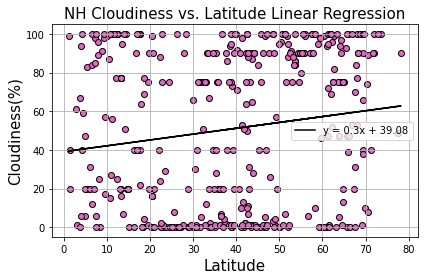

In [19]:
# Creating New y_axis data
x_nh_latitude = northern_hemisphere_cities_df['Lattitude']
y_nh_cloudiness = northern_hemisphere_cities_df['Cloudiness']

# Setting the Linear Regression Equation
latnh_slope, latnh_int, latnh_r,latnh_p,latnh_stderr = st.linregress(x_nh_latitude,y_nh_cloudiness)

# Linear Regression Label
line_eq = "y = " + str(round(latnh_slope,2)) + "x + " + str(round(latnh_int,2))

line_of_best_fit = x_nh_latitude * latnh_slope + latnh_int

# Plotting the scatter plots with the Linear Regression Equation
fig2, ax2 = plt.subplots()
ax2.set_title('NH Cloudiness vs. Latitude Linear Regression',fontsize=15)
ax2.set_ylabel('Cloudiness(%)', fontsize=15)
ax2.set_xlabel('Latitude',fontsize=15)
ax2.plot(x_nh_latitude,line_of_best_fit,'black')
ax2.scatter(x_nh_latitude,y_nh_cloudiness, edgecolors='black',c='#eb63c6')
ax2.grid(True)
ax2.legend([line_eq])
fig2.tight_layout()
plt.savefig('../Images/NH_Latitude_vs_cloudiness.png')
print(f'The r-sqaured value is {latnh_r**2}')
plt.show()




####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-sqaured value is 0.06953101580753748


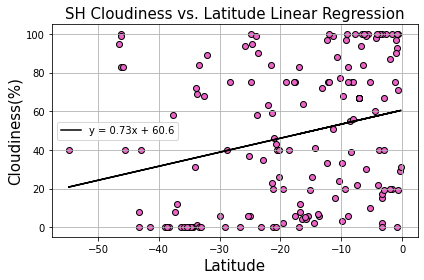

In [20]:
# Creating New y_axis data
x_sh_latitude = southern_hemisphere_cities_df['Lattitude']
y_sh_cloudiness = southern_hemisphere_cities_df['Cloudiness']

# Setting the Linear Regression Equation
latsh_slope, latsh_int, latsh_r,latsh_p,latsh_stderr = st.linregress(x_sh_latitude,y_sh_cloudiness)

# Linear Regression Label
line_eq = "y = " + str(round(latsh_slope,2)) + "x + " + str(round(latsh_int,2))

line_of_best_fit = x_sh_latitude * latsh_slope + latsh_int

# Plotting the scatter plots with the Linear Regression Equation
fig2, ax2 = plt.subplots()
ax2.set_title('SH Cloudiness vs. Latitude Linear Regression',fontsize=15)
ax2.set_ylabel('Cloudiness(%)', fontsize=15)
ax2.set_xlabel('Latitude',fontsize=15)
ax2.plot(x_sh_latitude,line_of_best_fit,'black')
ax2.scatter(x_sh_latitude,y_sh_cloudiness, edgecolors='black',c='#eb63c6')
ax2.grid(True)
ax2.legend([line_eq])
fig2.tight_layout()
plt.savefig('../Images/sh_Latitude_vs_cloudiness.png')
print(f'The r-sqaured value is {latsh_r**2}')
plt.show()




####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-sqaured value is 0.08395844976961177


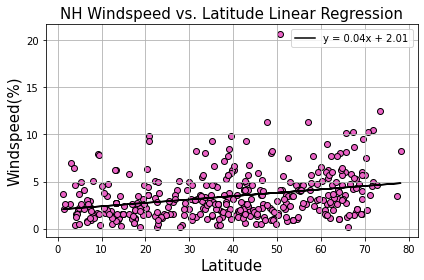

In [21]:
# Creating New y_axis data
x_nh_latitude = northern_hemisphere_cities_df['Lattitude']
y_nh_windspeed = northern_hemisphere_cities_df['Wind Speed']

# Setting the Linear Regression Equation
latnh_slope, latnh_int, latnh_r,latnh_p,latnh_stderr = st.linregress(x_nh_latitude,y_nh_windspeed)

# Linear Regression Label
line_eq = "y = " + str(round(latnh_slope,2)) + "x + " + str(round(latnh_int,2))

line_of_best_fit = x_nh_latitude * latnh_slope + latnh_int

# Plotting the scatter plots with the Linear Regression Equation
fig2, ax2 = plt.subplots()
ax2.set_title('NH Windspeed vs. Latitude Linear Regression',fontsize=15)
ax2.set_ylabel('Windspeed(%)', fontsize=15)
ax2.set_xlabel('Latitude',fontsize=15)
ax2.plot(x_nh_latitude,line_of_best_fit,'black')
ax2.scatter(x_nh_latitude,y_nh_windspeed, edgecolors='black',c='#eb63c6')
ax2.grid(True)
ax2.legend([line_eq])
fig2.tight_layout()
plt.savefig('../Images/NH_Latitude_vs_windspeed.png')
print(f'The r-sqaured value is {latnh_r**2}')
plt.show()




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-sqaured value is 0.046929542656219674


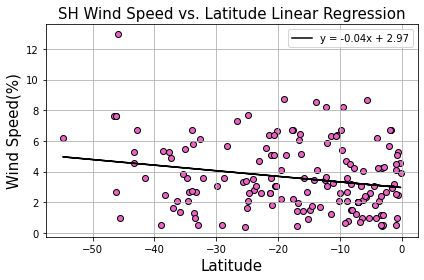

In [22]:
# Creating New y_axis data
x_sh_latitude = southern_hemisphere_cities_df['Lattitude']
y_sh_windspeed = southern_hemisphere_cities_df['Wind Speed']

# Setting the Linear Regression Equation
latsh_slope, latsh_int, latsh_r,latsh_p,latsh_stderr = st.linregress(x_sh_latitude,y_sh_windspeed)

# Linear Regression Label
line_eq = "y = " + str(round(latsh_slope,2)) + "x + " + str(round(latsh_int,2))

line_of_best_fit = x_sh_latitude * latsh_slope + latsh_int

# Plotting the scatter plots with the Linear Regression Equation
fig2, ax2 = plt.subplots()
ax2.set_title('SH Wind Speed vs. Latitude Linear Regression',fontsize=15)
ax2.set_ylabel('Wind Speed(%)', fontsize=15)
ax2.set_xlabel('Latitude',fontsize=15)
ax2.plot(x_sh_latitude,line_of_best_fit,'black')
ax2.scatter(x_sh_latitude,y_sh_windspeed, edgecolors='black',c='#eb63c6')
ax2.grid(True)
ax2.legend([line_eq])
fig2.tight_layout()
plt.savefig('../Images/sh_Latitude_vs_windspeed.png')
print(f'The r-sqaured value is {latsh_r**2}')
plt.show()
